In [1]:
import matplotlib.pyplot as plt
import requests
from scipy import stats
%matplotlib inline
import pandas as pd
import numpy as np
import scipy.stats as st

file='Road_Accident_Data.csv'
accident_df=pd.read_csv(file)
accident_df.pop('Carriageway_Hazards')
#accident_df.pop('Accident_Index')
accident_df.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [2]:
accident_df['Accident_Severity'] = accident_df['Accident_Severity'].replace({'Fetal': 'Fatal'})

In [4]:
accident_speed = accident_df.groupby(by='Speed_limit')
speed_count = accident_speed['Accident_Index'].count()

speed_count

Speed_limit
10         3
15         2
20      2899
30    200040
40     25650
50     10191
60     46826
70     22362
Name: Accident_Index, dtype: int64

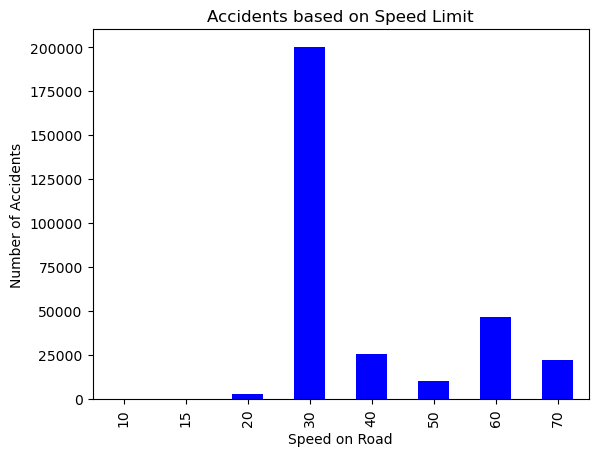

In [7]:
speed_bar = speed_count.plot(kind='bar', color='blue')
speed_bar.set_xlabel("Speed on Road")
speed_bar.set_ylabel("Number of Accidents")
speed_bar.set_title("Accidents based on Speed Limit")
plt.show()

In [8]:
accident_roadtype = accident_df.groupby(by='Road_Type')
road_count = accident_roadtype['Accident_Index'].count()

road_count
                                

Road_Type
Dual carriageway       45467
One way street          6197
Roundabout             20929
Single carriageway    230612
Slip road               3234
Name: Accident_Index, dtype: int64

In [9]:
accident_df.columns

Index(['Accident_Index', 'Accident Date', 'Day_of_Week', 'Junction_Control',
       'Junction_Detail', 'Accident_Severity', 'Latitude', 'Light_Conditions',
       'Local_Authority_(District)', 'Longitude', 'Number_of_Casualties',
       'Number_of_Vehicles', 'Police_Force', 'Road_Surface_Conditions',
       'Road_Type', 'Speed_limit', 'Time', 'Urban_or_Rural_Area',
       'Weather_Conditions', 'Vehicle_Type'],
      dtype='object')

In [10]:
df30 = accident_df.loc[accident_df["Speed_limit"] == 30, :]
df30.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200901BS70001,1/1/2021,Thursday,Give way or uncontrolled,T or staggered junction,Serious,51.512273,Daylight,Kensington and Chelsea,-0.201349,1,2,Metropolitan Police,Dry,One way street,30,15:11,Urban,Fine no high winds,Car
1,200901BS70002,1/5/2021,Monday,Give way or uncontrolled,Crossroads,Serious,51.514399,Daylight,Kensington and Chelsea,-0.199248,11,2,Metropolitan Police,Wet or damp,Single carriageway,30,10:59,Urban,Fine no high winds,Taxi/Private hire car
2,200901BS70003,1/4/2021,Sunday,Give way or uncontrolled,T or staggered junction,Slight,51.486668,Daylight,Kensington and Chelsea,-0.179599,1,2,Metropolitan Police,Dry,Single carriageway,30,14:19,Urban,Fine no high winds,Taxi/Private hire car
3,200901BS70004,1/5/2021,Monday,Auto traffic signal,T or staggered junction,Serious,51.507804,Daylight,Kensington and Chelsea,-0.203110,1,2,Metropolitan Police,Frost or ice,Single carriageway,30,8:10,Urban,Other,Motorcycle over 500cc
4,200901BS70005,1/6/2021,Tuesday,Auto traffic signal,Crossroads,Serious,51.482076,Darkness - lights lit,Kensington and Chelsea,-0.173445,1,2,Metropolitan Police,Dry,Single carriageway,30,17:25,Urban,Fine no high winds,Car


In [11]:
df30["Accident_Severity"].value_counts()

Accident_Severity
Slight     174427
Serious     24076
Fatal        1537
Name: count, dtype: int64

In [12]:
df30["Road_Type"].value_counts()

Road_Type
Single carriageway    166477
Dual carriageway       12911
Roundabout             12892
One way street          5742
Slip road                854
Name: count, dtype: int64

In [13]:
df30_road = df30.loc[df30["Accident_Severity"] == "Fatal", ["Road_Type","Speed_limit"]]
df30_road

,Road_Type,Speed_limit
601,Single carriageway,30
602,Single carriageway,30
603,Dual carriageway,30
604,Roundabout,30
605,Single carriageway,30
...,...,...
306330,Roundabout,30
306376,Dual carriageway,30
306513,Single carriageway,30
307605,Single carriageway,30


In [14]:
accident_count = df30_road["Road_Type"].value_counts()
print(accident_count)

Road_Type
Single carriageway    1300
Dual carriageway       137
One way street          49
Roundabout              46
Slip road                3
Name: count, dtype: int64


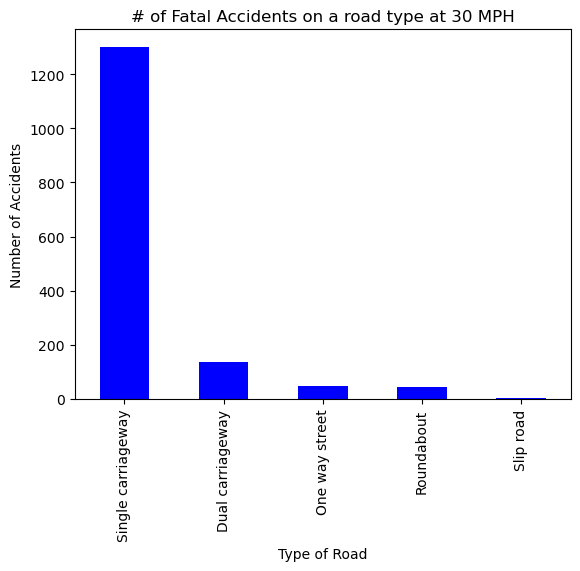

In [21]:
road_bar30 = accident_count.plot(kind='bar', color='blue')
road_bar30.set_xlabel("Type of Road")
road_bar30.set_ylabel("Number of Accidents")
road_bar30.set_title("# of Fatal Accidents on a road type at 30 MPH")
plt.show()

In [34]:
df30_road2 = df30.loc[df30["Accident_Severity"] == "Serious", ["Road_Type","Speed_limit"]]
df30_road2

,Road_Type,Speed_limit
0,One way street,30
1,Single carriageway,30
3,Single carriageway,30
4,Single carriageway,30
6,Single carriageway,30
...,...,...
307853,Single carriageway,30
307866,NaN,30
307913,Single carriageway,30
307923,Single carriageway,30


In [35]:
accident_count2 = df30_road2["Road_Type"].value_counts()
print(accident_count2)

Road_Type
Single carriageway    20765
Dual carriageway       1415
Roundabout             1037
One way street          688
Slip road                48
Name: count, dtype: int64


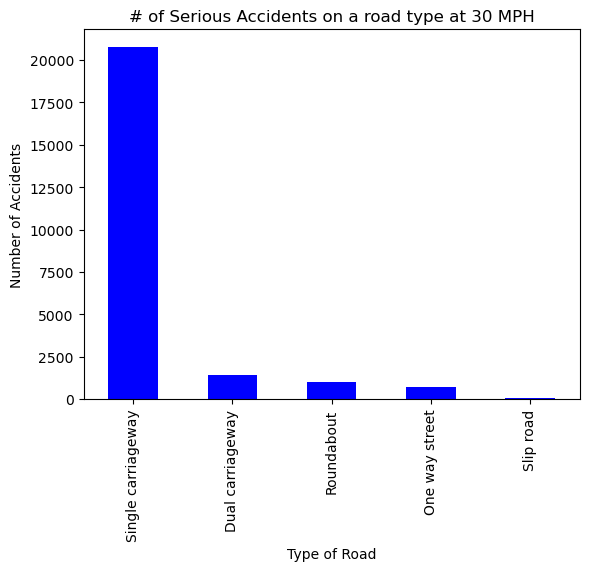

In [36]:
road_bar30_2 = accident_count2.plot(kind='bar', color='blue')
road_bar30_2.set_xlabel("Type of Road")
road_bar30_2.set_ylabel("Number of Accidents")
road_bar30_2.set_title("# of Serious Accidents on a road type at 30 MPH")
plt.show()

In [37]:
df30_road3 = df30.loc[df30["Accident_Severity"] == "Slight", ["Road_Type","Speed_limit"]]
df30_road3

,Road_Type,Speed_limit
2,Single carriageway,30
5,Single carriageway,30
7,Dual carriageway,30
8,Single carriageway,30
9,Single carriageway,30
...,...,...
307940,Single carriageway,30
307942,Single carriageway,30
307945,Single carriageway,30
307964,Single carriageway,30


In [38]:
accident_count3 = df30_road3["Road_Type"].value_counts()
print(accident_count3)

Road_Type
Single carriageway    144412
Roundabout             11809
Dual carriageway       11359
One way street          5005
Slip road                803
Name: count, dtype: int64


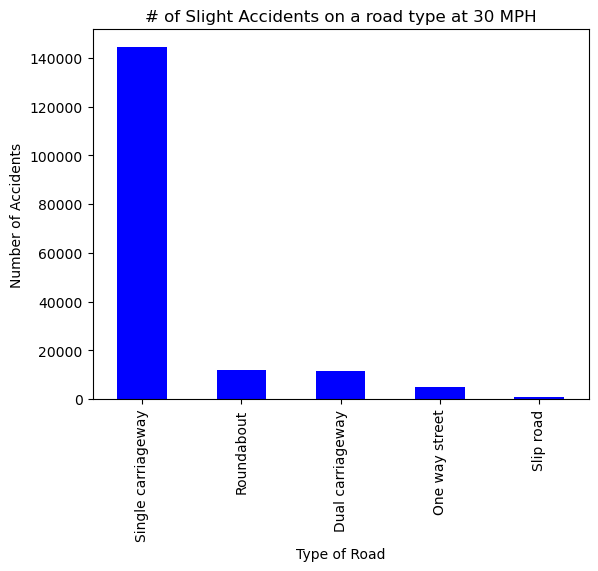

In [40]:
road_bar30_3 = accident_count3.plot(kind='bar', color='blue')
road_bar30_3.set_xlabel("Type of Road")
road_bar30_3.set_ylabel("Number of Accidents")
road_bar30_3.set_title("# of Slight Accidents on a road type at 30 MPH")
plt.show()

In [15]:
df60 = accident_df.loc[accident_df["Speed_limit"] == 60, :]
df60.head()

,Accident_Index,Accident Date,Day_of_Week,Junction_Control,Junction_Detail,Accident_Severity,Latitude,Light_Conditions,Local_Authority_(District),Longitude,Number_of_Casualties,Number_of_Vehicles,Police_Force,Road_Surface_Conditions,Road_Type,Speed_limit,Time,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
5228,200901HT20205,5/1/2021,Friday,Data missing or out of range,Not at junction or within 20 metres,Serious,51.535696,Daylight,Tower Hamlets,-0.025085,2,2,Metropolitan Police,Dry,Dual carriageway,60,15:55,Urban,Fine no high winds,Car
7138,200901KD50183,4/29/2021,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,51.585642,Daylight,Havering,0.171384,1,4,Metropolitan Police,Dry,Dual carriageway,60,12:36,Urban,Fine no high winds,Car
7198,200901KD50255,6/9/2021,Tuesday,Give way or uncontrolled,T or staggered junction,Serious,51.541914,Darkness - no lighting,Havering,0.276890,2,2,Metropolitan Police,Dry,Single carriageway,60,22:44,Rural,Fine no high winds,Car
7327,200901KD50407,9/11/2021,Friday,Give way or uncontrolled,Crossroads,Slight,51.528659,Daylight,Havering,0.250709,1,2,Metropolitan Police,Dry,Single carriageway,60,17:44,Rural,Fine no high winds,Car
7437,200901KD50532,11/18/2021,Wednesday,Give way or uncontrolled,T or staggered junction,Slight,51.528749,Darkness - lights lit,Havering,0.250713,5,2,Metropolitan Police,Dry,Single carriageway,60,22:00,Rural,Fine no high winds,Car


In [16]:
df60["Accident_Severity"].value_counts()

Accident_Severity
Slight     36696
Serious     8817
Fatal       1313
Name: count, dtype: int64

In [17]:
df60["Road_Type"].value_counts()

Road_Type
Single carriageway    41627
Roundabout             2518
Dual carriageway       1998
Slip road               448
One way street           83
Name: count, dtype: int64

In [18]:
df60_road = df60.loc[df60["Accident_Severity"] == "Fatal", ["Road_Type","Speed_limit"]]
df60_road

,Road_Type,Speed_limit
23429,Single carriageway,60
23467,Single carriageway,60
23690,Single carriageway,60
23718,Single carriageway,60
23775,Single carriageway,60
...,...,...
307687,Single carriageway,60
307758,Single carriageway,60
307813,Single carriageway,60
307859,Single carriageway,60


In [19]:
accident_count60 = df60_road["Road_Type"].value_counts()
print(accident_count60)

Road_Type
Single carriageway    1270
Dual carriageway        31
Roundabout               8
Slip road                3
Name: count, dtype: int64


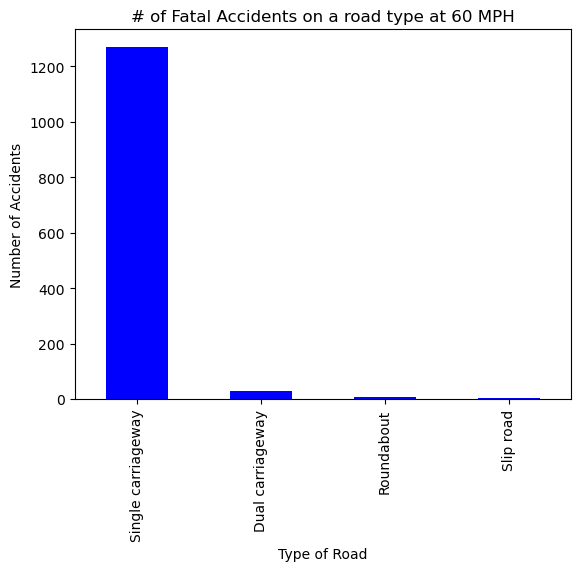

In [32]:
road_bar60 = accident_count60.plot(kind='bar', color='blue')
road_bar60.set_xlabel("Type of Road")
road_bar60.set_ylabel("Number of Accidents")
road_bar60.set_title("# of Fatal Accidents on a road type at 60 MPH")
plt.show()

In [41]:
df60_road_2 = df60.loc[df60["Accident_Severity"] == "Serious", ["Road_Type","Speed_limit"]]
df60_road_2

,Road_Type,Speed_limit
5228,Dual carriageway,60
7198,Single carriageway,60
11784,Single carriageway,60
12235,Single carriageway,60
20449,Dual carriageway,60
...,...,...
307900,Single carriageway,60
307903,Single carriageway,60
307966,Single carriageway,60
307971,Single carriageway,60


In [42]:
accident_count60_2 = df60_road_2["Road_Type"].value_counts()
print(accident_count60_2)

Road_Type
Single carriageway    8198
Dual carriageway       281
Roundabout             265
Slip road               46
One way street          11
Name: count, dtype: int64


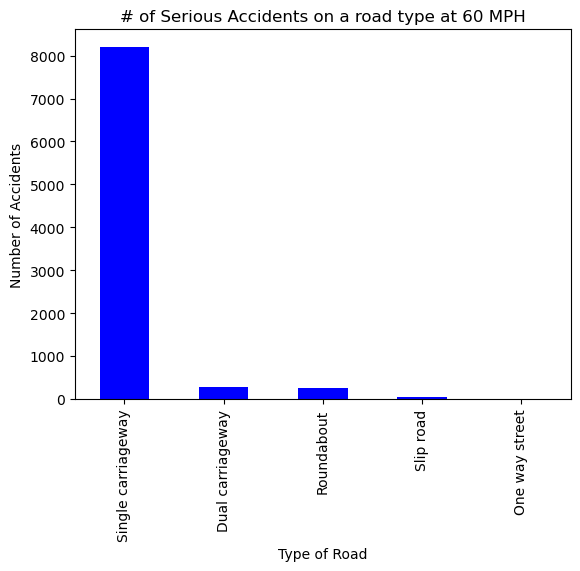

In [44]:
road_bar60_2 = accident_count60_2.plot(kind='bar', color='blue')
road_bar60_2.set_xlabel("Type of Road")
road_bar60_2.set_ylabel("Number of Accidents")
road_bar60_2.set_title("# of Serious Accidents on a road type at 60 MPH")
plt.show()

In [47]:
df60_road_3 = df60.loc[df60["Accident_Severity"] == "Slight", ["Road_Type","Speed_limit"]]
df60_road_3

,Road_Type,Speed_limit
7138,Dual carriageway,60
7327,Single carriageway,60
7437,Single carriageway,60
7451,Dual carriageway,60
13296,Slip road,60
...,...,...
307962,Single carriageway,60
307965,Single carriageway,60
307967,Single carriageway,60
307968,Single carriageway,60


In [48]:
accident_count60_3 = df60_road_3["Road_Type"].value_counts()
print(accident_count60_3)

Road_Type
Single carriageway    32159
Roundabout             2245
Dual carriageway       1686
Slip road               399
One way street           72
Name: count, dtype: int64


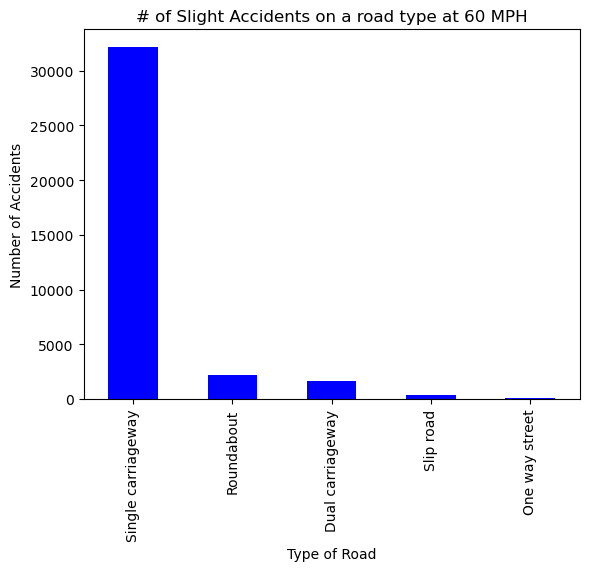

In [49]:
road_bar60_3 = accident_count60_3.plot(kind='bar', color='blue')
road_bar60_3.set_xlabel("Type of Road")
road_bar60_3.set_ylabel("Number of Accidents")
road_bar60_3.set_title("# of Slight Accidents on a road type at 60 MPH")
plt.show()

In [14]:
df30_Fatal = df30.loc[df30["Accident_Severity"] == "Fatal", ["Accident_Index","Speed_limit"]]
df30_Fatal

,Accident_Index,Speed_limit
601,200901BS70704,30
602,200901BS70705,30
603,200901BS70706,30
604,200901BS70707,30
605,200901BS70708,30
...,...,...
306330,201063AC10710,30
306376,201063AC15310,30
306513,201063AC29110,30
307605,201063DP35410,30


In [15]:
df60_Fatal = df60.loc[df60["Accident_Severity"] == "Fatal", ["Accident_Index", "Speed_limit"]]
df60_Fatal

,Accident_Index,Speed_limit
23429,2.01E+12,60
23467,2.01E+12,60
23690,2.01E+12,60
23718,2.01E+12,60
23775,2.01E+12,60
...,...,...
307687,201091NE00716,60
307758,201091NH00032,60
307813,201091NJ01533,60
307859,201091NJ11329,60


In [16]:
df30_60 = pd.concat([df30_Fatal, df60_Fatal])
df30_60

,Accident_Index,Speed_limit
601,200901BS70704,30
602,200901BS70705,30
603,200901BS70706,30
604,200901BS70707,30
605,200901BS70708,30
...,...,...
307687,201091NE00716,60
307758,201091NH00032,60
307813,201091NJ01533,60
307859,201091NJ11329,60


In [17]:
total = df30_60["Speed_limit"].value_counts()
total


Speed_limit
30    1537
60    1313
Name: count, dtype: int64

In [25]:
# Labels for the sections of our pie chart
labels = ["30 MPH", "60 MPH"]

# The values of each section of the pie chart
sizes = [1537, 1313]

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0)

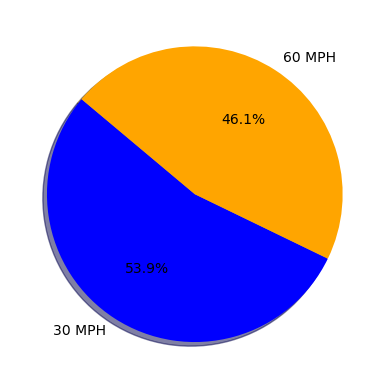

In [26]:
## Number of Fatal car accidents
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [28]:
# Labels for the sections of our pie chart
labels = ["Slight", "Serious", "Fatal"]

# The values of each section of the pie chart
sizes = [36696, 8817, 1313]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)

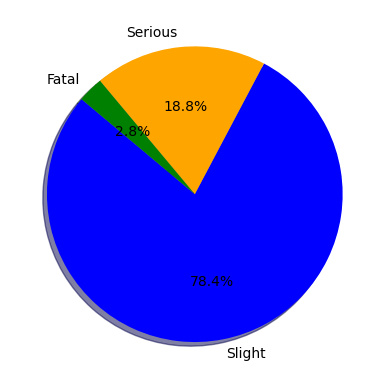

In [29]:
## Accident percentages for 60 MPH roads
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()

In [30]:
# Labels for the sections of our pie chart
labels = ["Slight", "Serious", "Fatal"]

# The values of each section of the pie chart
sizes = [174427, 24076, 1537]

# The colors of each section of the pie chart
colors = ["blue", "orange", "green"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0, 0, 0)

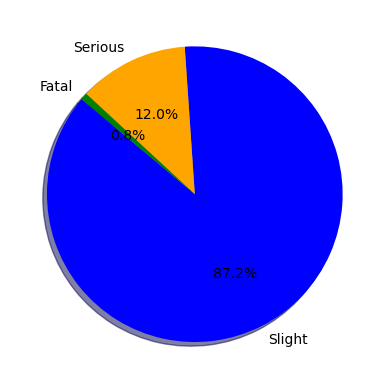

In [31]:
## Accident percentages for 30 MPH roads
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.show()